# AI4DL - AI for Deep Learning

A sample case for AI4DL.

### Load Libraries


In [1]:
%matplotlib inline

import inspect
import json
import pickle

import random
import numpy as np 
import pandas as pd
import numexpr as ne
import sklearn
from sklearn import preprocessing
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import copy

from matplotlib import pyplot as plt 

from joblib import dump, load

import os,sys,inspect

In [2]:
sys.path.append('../package')

import AI4DL
from AI4DL import AI4DL

### 0 . Configuration

In [3]:
#training_file = "training.csv"
testing_file = "sample.csv"

selected_features = ["cpu.usage", "cpu.usage.cores", "cpu.usage.pct", "cpu.usage.pct.container.requested", "mem.current", "mem.limit", "mem.usage.pct", "mem.working.set"]
container_id = "pod.id"

n_hidden  = 10
n_history  = 3
learning_rate = 0.001
n_epochs = 100
n_clusters = 5

crbm_save = "ai4dl_crbm1"
kmeans_save = "ai4dl_kmeans1.joblib"
scaler_save = "ai4dl_scaler1.joblib"

palette = {0:'grey', 1:'green', 2:'blue', 3:'red', 4:'orange'}
cpu_idx = 0 # cpu.usage
mem_idx = 4 # mem.current

### 1. Load Datasets

Here we will load an already trained model, using the IBM traces from DLaaS, instead of training the model from scratch, but we leave here the code for when a *training* file is available.

In [4]:
ai4dl1 = AI4DL.AI4DL()
#ai4dl1.LoadTrainingDataset(training_file, selected_features, container_id)

#### Example Dataset: That's how data looks

In [5]:
sample = pd.read_csv(testing_file)
sample.head()

,timestamp,service,pod.id,cpu.num.cores,cpu.usage,cpu.usage.cores,cpu.usage.pct,cpu.usage.pct.container.requested,mem.current,mem.limit,mem.usage.pct,mem.working.set
0,1565962220,service1,exec1,4,756911788,0.041,1.03,1.00,2478080,5242880000,0.05,2478080
1,1565962270,service1,exec1,4,686240513,0.026,0.65,0.63,10842112,5242880000,0.20,10719232
2,1565962300,service1,exec1,4,679150611,0.029,0.73,0.71,12382208,5242880000,0.23,12259328
3,1565962340,service1,exec1,4,3303773966,0.180,4.50,4.39,13713408,5242880000,0.26,13590528
4,1565962350,service1,exec1,4,14934443475,1.049,26.23,25.61,44183552,5242880000,0.69,36032512


### 2. Train/Load the model

Now we train the model. Here, if the training file is loaded, this will train the model using the previous configuration.

(At this time we don't train the model from scratch, but we will load an already trained model).

In [6]:
#ai4dl1.TrainModel(n_clusters, n_hidden, n_history, learning_rate, n_epochs, crbm_save, kmeans_save, scaler_save, seed = 123)

Here we're loading a model, instead of training it we just laod the CRBM and cluster into AI4DL

In [7]:
ai4dl1.LoadModel(crbm_save, kmeans_save, scaler_save)
ai4dl1.exec_id = container_id
ai4dl1.features = selected_features
ai4dl1.n_features = len(selected_features)

### 3. Inference of Sequences

Here, we would get the training dataset and pass for prediction.
* An alternative to **GetTrainingDataset() + Predict()** is to use the function **Evaluate()**

In [8]:
#list_of_timeseries_tr = ai4dl1.GetTrainingDataset()
#predicted_seq_phases_tr = ai4dl1.Predict(list_of_timeseries_tr)

## -> An alternative of the above would be:
#predicted_seq_phases_tr = ai4dl1.Evaluate()

Now we pass through the test sample.
* An alternative to **TransformData() + Predict()** is to use the function **LoadAndPredict()**

In [9]:
list_of_timeseries_ts = ai4dl1.TransformData(testing_file)
predicted_seq_phases_ts = ai4dl1.Predict(list_of_timeseries_ts)

## -> An alternative of the above would be:
#predicted_seq_phases_ts = ai4dl1.LoadAndPredict(testing_file)

### 4.1 Plot a trace from the Test Sample

Notes:
- Values of CPU and Mem are scaled/normalized, through the "scaler"
- "Green" phase is warm-up

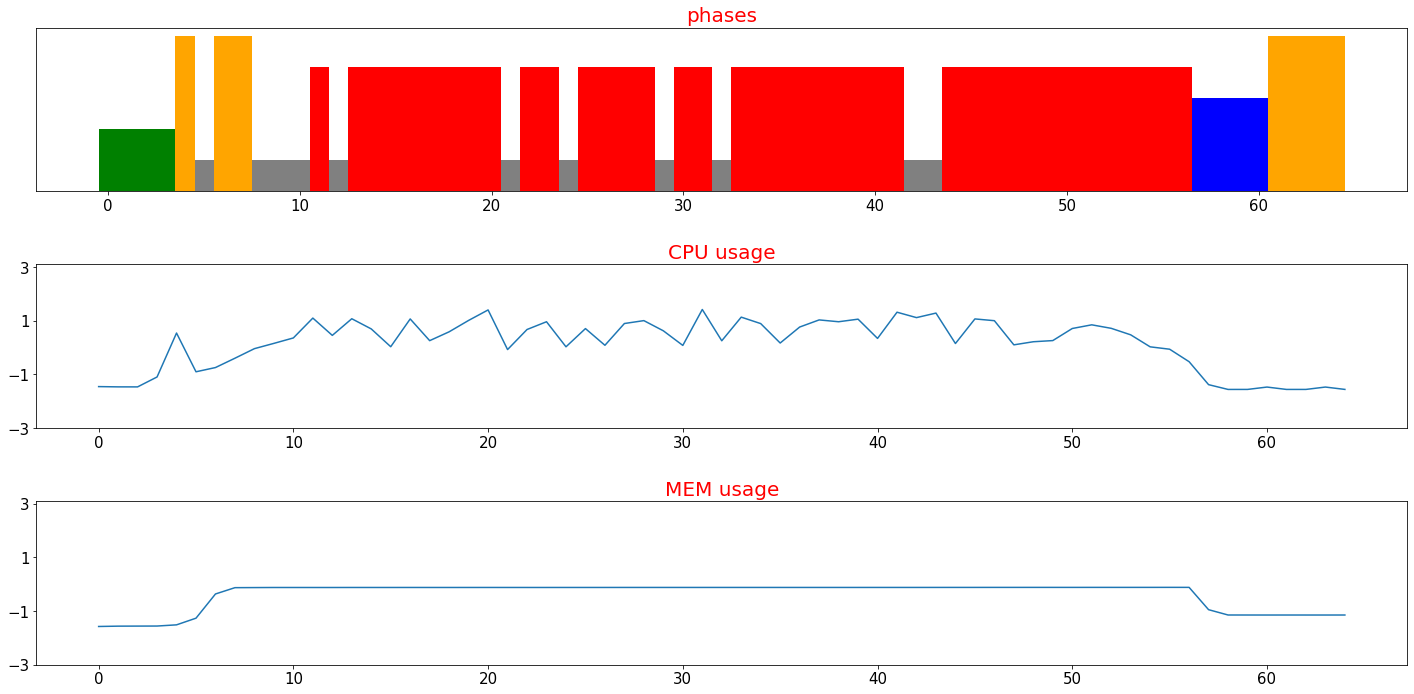

In [10]:
selected_exec = 0
ai4dl1.PrintTrace(list_of_timeseries_ts, predicted_seq_phases_ts, selected_exec, cpu_idx, mem_idx, palette, col_names = ["CPU usage", "MEM usage"], f_name = "trace_11.png")

### 4.2 Plot variance from the Test Sample

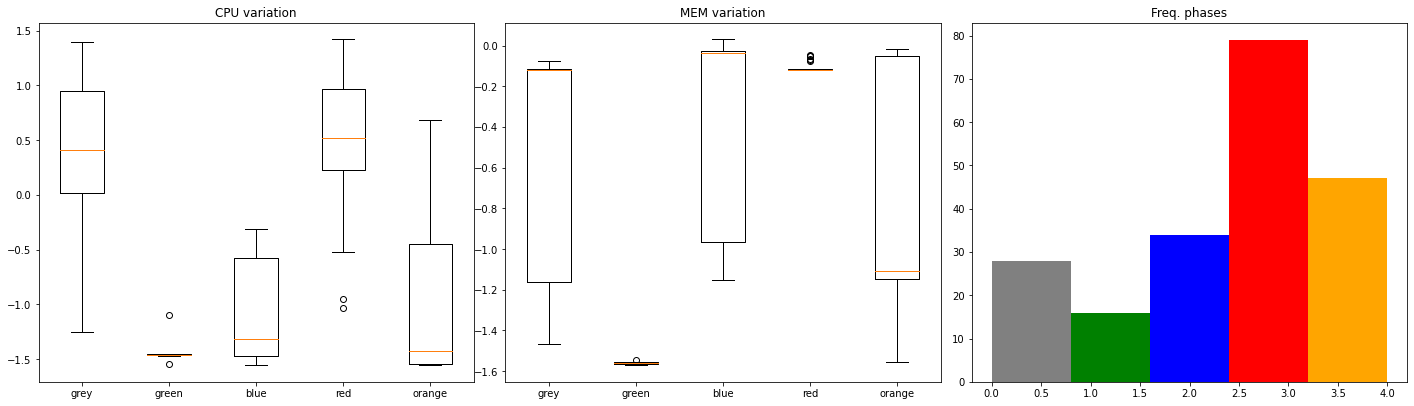

In [11]:
ai4dl1.PrintVarAnalysis(list_of_timeseries_ts, predicted_seq_phases_ts, cpu_idx, mem_idx, palette, col_names = ["CPU variation", "MEM variation"], f_name = "variance.png")